# Practica Redes Bayesianas 

### Estudiante: Nicolò Trevisani

## 1. Ejercicio 1

In [2]:
### ![grafo.png](attachment:grafo.png)

- A partir del grafo dado por el experto, determina la expresión que refleja la factorización de la distribución global, y escríbela como una secuencia de caracteres del tipo generado por la función modelstring del paquete de R bnlearn.

NOTA: Como ya se comentado anteriormente, es importante evitar tildes a la hora de nombrar los nodos. Tampoco son recomendables espacios en blanco ni ningún tipo de carácter especial.

- A continuación, introduce el DAG en R utilizando la definicíon del modelo que acabas de crear

- Realiza una lista de los padres e hijos de cada uno de los nodos

- Realiza una lista de todas las conexiones fundamentales presentes en el grafo, y realiza una clasificación de cada una de ellas determinando si es una estructura en serie, divergente o convergente.

- ¿Se observa alguna v-estructura en el grafo?

- Intenta introducir un arco que parta del nodo neblina y se dirija hacia escarcha, y otro que vaya de granizo a lluvia. Comenta qué sucede en cada caso, y si el resultado daría lugar a una red bayesiana válida.

- Determina la manta de Markov del nodo rocio

- Introduce un arco que parta del nodo Lluvia y se dirija al nodo Niebla, ¿cambia la manta de Markov del nodo rocio? En caso afirmativo, ¿cómo lo hace?

Para continuar, elimina el arco definido anteriormente entre los nodos Lluvia y Niebla, recuperando el DAG original.

### Desarrollo ejercicio 1

#### A partir del grafo dado por el experto, determina la expresión que refleja la factorización de la distribución global, y escríbela como una secuencia de caracteres del tipo generado por la función modelstring del paquete de R bnlearn.

[Viento][Rocio][Escarcha][Niebla][Nieblina][Lluvia][Granizo][Tormenta][Nieve][Nieve_Suelo]

#### A continuación, introduce el DAG en R utilizando la definicíon del modelo que acabas de crear

In [20]:
library(bnlearn)

In [21]:
## Defino el grafo vacío:
dag <- empty.graph(nodes=c("Viento", "Rocio", "Escarcha", "Niebla", "Nieblina", 
                           "Lluvia", "Granizo", "Tormenta", "Nieve", "Nieve_Suelo"))


  Random/Generated Bayesian network

  model:
   [Viento][Rocio|Viento][Lluvia|Viento][Escarcha|Rocio][Niebla|Viento:Rocio]
   [Tormenta|Lluvia][Nieblina|Niebla][Granizo|Tormenta][Nieve|Tormenta]
   [Nieve_Suelo|Nieve]
  nodes:                                 10 
  arcs:                                  10 
    undirected arcs:                     0 
    directed arcs:                       10 
  average markov blanket size:           2,00 
  average neighbourhood size:            2,00 
  average branching factor:              1,00 

  generation algorithm:                  Empty 



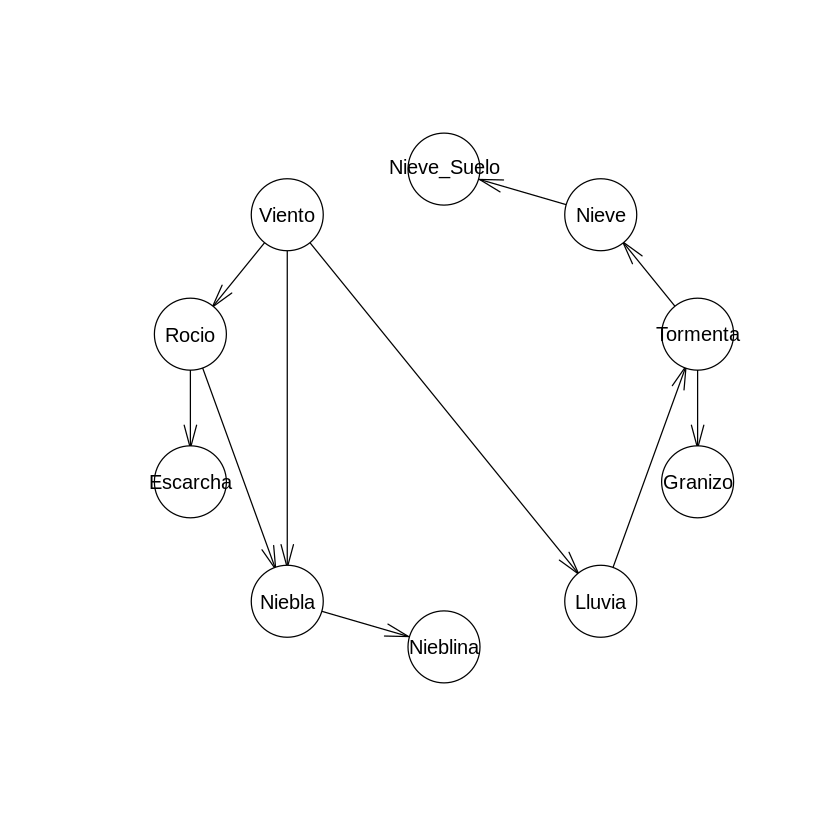

In [22]:
# Defino los arocs
arc.set <- matrix(c("Viento", "Lluvia",
                    "Viento", "Niebla",
                    "Viento", "Rocio",
                    "Rocio",  "Niebla",
                    "Rocio",  "Escarcha",
                    "Niebla", "Nieblina",
                    "Lluvia", "Tormenta",
                    "Tormenta", "Granizo",
                    "Tormenta", "Nieve",
                    "Nieve",    "Nieve_Suelo"),
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to")))
arcs(dag) <- arc.set

print(dag)
plot(dag)

In [23]:
# Verifico la factorización del punto anterior
modelstring(dag)

[1] "[Viento][Rocio|Viento][Lluvia|Viento][Escarcha|Rocio][Niebla|Viento:Rocio][Tormenta|Lluvia][Nieblina|Niebla][Granizo|Tormenta][Nieve|Tormenta][Nieve_Suelo|Nieve]"

#### Realiza una lista de los padres e hijos de cada uno de los nodos

In [48]:
for (node in nodes(dag)){
    print(paste("NODO: ", node))
    print("----")
    print("PADRES:")
    print(parents(dag, node = node))
    print("----")
    print("HIJOS:")
    print(children(dag, node = node))
    print("====")


}

[1] "NODO:  Viento"
[1] "----"
[1] "PADRES:"
character(0)
[1] "----"
[1] "HIJOS:"
[1] "Rocio"  "Niebla" "Lluvia"
[1] "===="
[1] "NODO:  Rocio"
[1] "----"
[1] "PADRES:"
[1] "Viento"
[1] "----"
[1] "HIJOS:"
[1] "Escarcha" "Niebla"  
[1] "===="
[1] "NODO:  Escarcha"
[1] "----"
[1] "PADRES:"
[1] "Rocio"
[1] "----"
[1] "HIJOS:"
character(0)
[1] "===="
[1] "NODO:  Niebla"
[1] "----"
[1] "PADRES:"
[1] "Viento" "Rocio" 
[1] "----"
[1] "HIJOS:"
[1] "Nieblina"
[1] "===="
[1] "NODO:  Nieblina"
[1] "----"
[1] "PADRES:"
[1] "Niebla"
[1] "----"
[1] "HIJOS:"
character(0)
[1] "===="
[1] "NODO:  Lluvia"
[1] "----"
[1] "PADRES:"
[1] "Viento"
[1] "----"
[1] "HIJOS:"
[1] "Tormenta"
[1] "===="
[1] "NODO:  Granizo"
[1] "----"
[1] "PADRES:"
[1] "Tormenta"
[1] "----"
[1] "HIJOS:"
character(0)
[1] "===="
[1] "NODO:  Tormenta"
[1] "----"
[1] "PADRES:"
[1] "Lluvia"
[1] "----"
[1] "HIJOS:"
[1] "Granizo" "Nieve"  
[1] "===="
[1] "NODO:  Nieve"
[1] "----"
[1] "PADRES:"
[1] "Tormenta"
[1] "----"
[1] "HIJOS:"
[1] "Ni

#### Realiza una lista de todas las conexiones fundamentales presentes en el grafo, y realiza una clasificación de cada una de ellas determinando si es una estructura en serie, divergente o convergente.

In [52]:
dag$arcs

from,to
Viento,Lluvia
Viento,Niebla
Viento,Rocio
Rocio,Niebla
Rocio,Escarcha
Niebla,Nieblina
Lluvia,Tormenta
Tormenta,Granizo
Tormenta,Nieve
Nieve,Nieve_Suelo
